In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


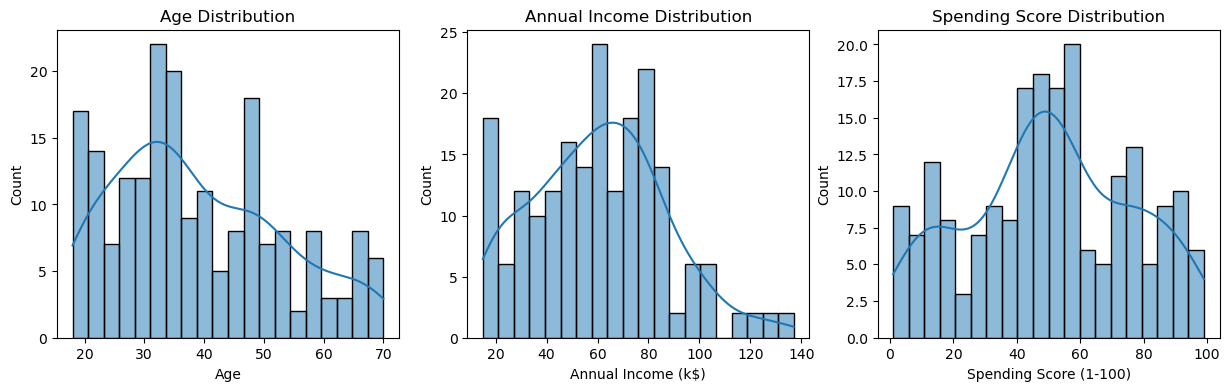

In [9]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")

plt.show()


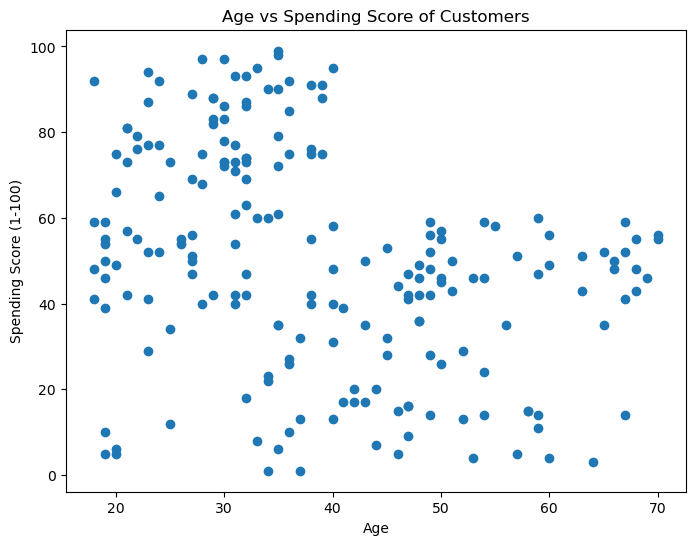

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score of Customers")
plt.show()

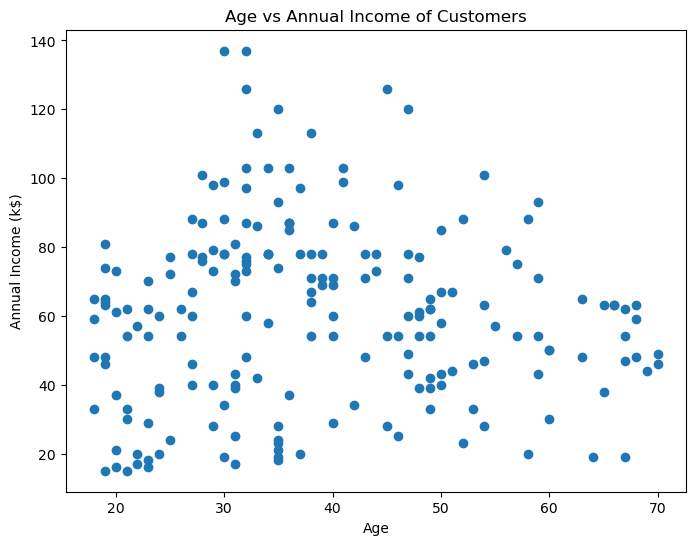

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income of Customers")
plt.show()

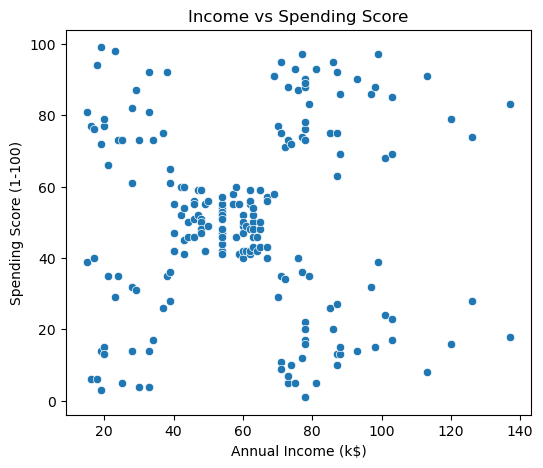

In [28]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()



In [30]:
# Select numeric features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


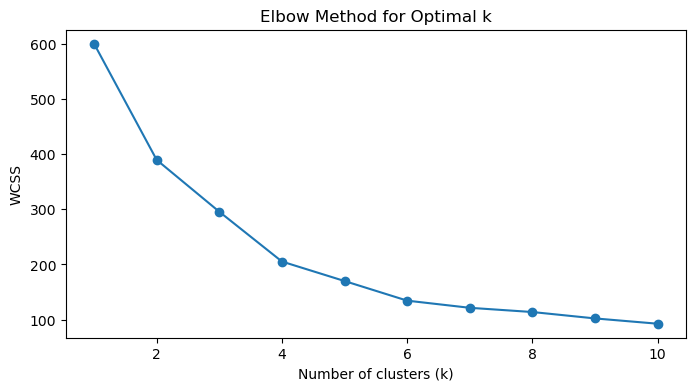

In [32]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [34]:
# Fit KMeans
k = 5
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster counts
print(df['Cluster'].value_counts())


Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


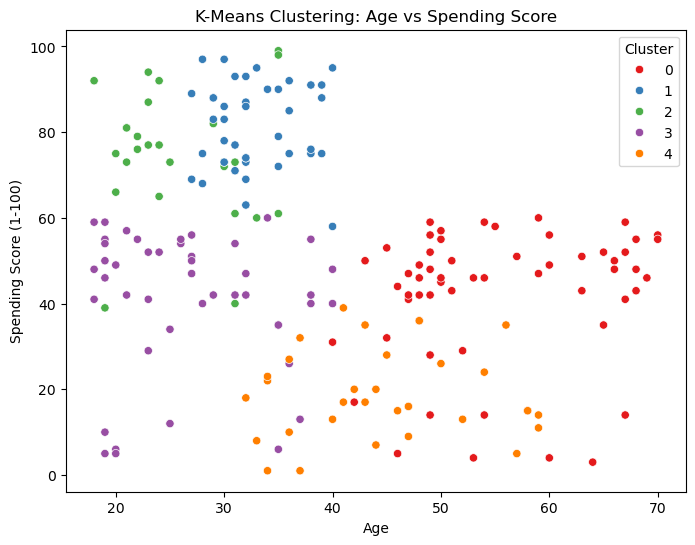

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("K-Means Clustering: Age vs Spending Score")
plt.show()


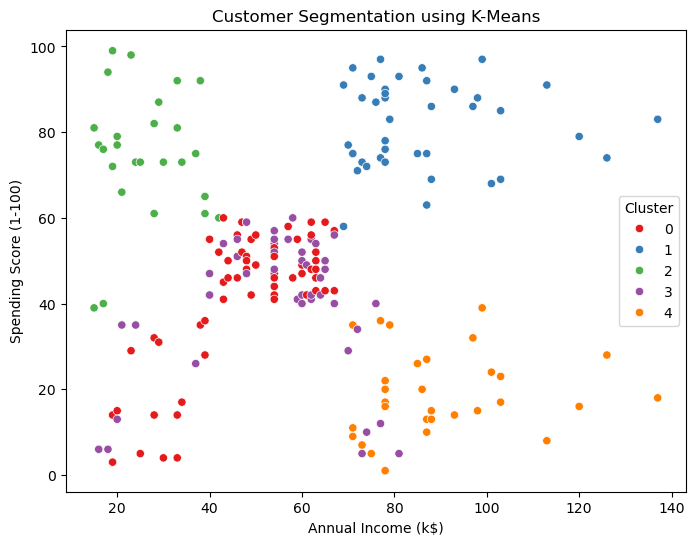

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("Customer Segmentation using K-Means")
plt.show()


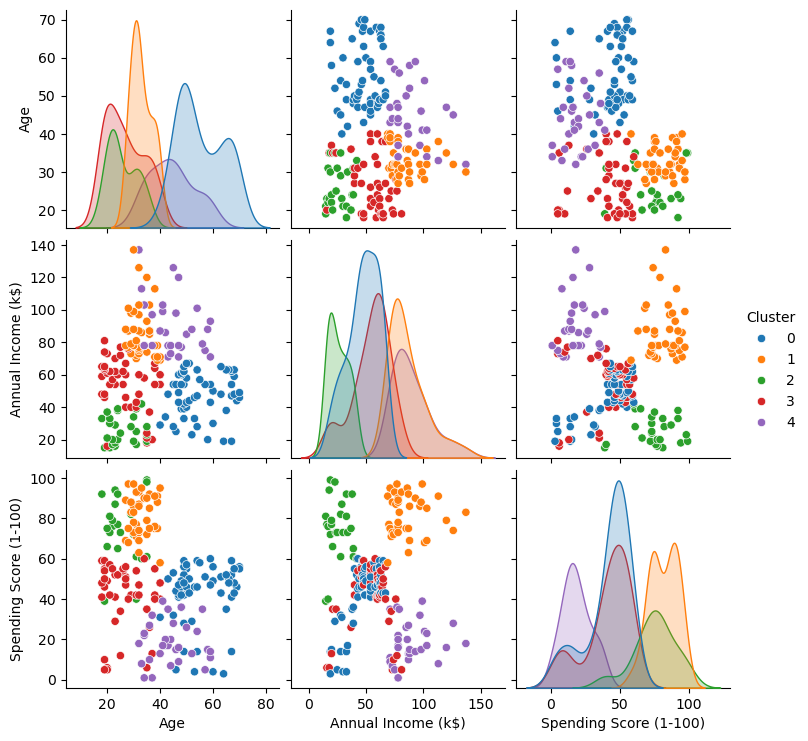

In [36]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster']],
             hue='Cluster', palette='tab10')
plt.show()


In [64]:
def predict_customer_cluster(age, income, spending_score, scaler, kmeans):
    
    
    new_data = pd.DataFrame({
        'Age': [age],
        'Annual Income (k$)': [income],
        'Spending Score (1-100)': [spending_score]
    })
    
    new_data_scaled = scaler.transform(new_data)
    cluster = kmeans.predict(new_data_scaled)
    
    return cluster[0]


In [66]:
cluster_id = predict_customer_cluster(
    age=30,
    income=65,
    spending_score=70,
    scaler=scaler,
    kmeans=kmeans
)

print("Predicted Cluster:", cluster_id)


Predicted Cluster: 1


In [61]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Count'}).reset_index()

print(cluster_summary)


   Cluster        Age  Annual Income (k$)  Spending Score (1-100)  Count
0        0  55.275862           47.620690               41.706897     58
1        1  32.875000           86.100000               81.525000     40
2        2  25.769231           26.115385               74.846154     26
3        3  26.733333           54.311111               40.911111     45
4        4  44.387097           89.774194               18.483871     31
